In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np

In [2]:
# 读取CSV文件
df = pd.read_csv('preprocess2.csv')
df = df.iloc[70000:]

# 定义目标变量和特征
target = '紫外线（指数）'
labels = df[target]
data = df.drop(columns=[target])

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# 标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 训练模型
model = SVR(kernel='rbf', C=2.0)
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 计算误差和得分
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
# 训练集和测试集的分布差异
print("\n训练集和测试集的分布差异:")
print("训练集的形状:", X_train.shape)
print("测试集的形状:", X_test.shape)

# 数据描述统计
print("\n数据描述统计:")
print(df.describe())

Mean Squared Error: 2.5604367788811424
R^2 Score: 0.7152531420750823
Mean Absolute Error: 0.9724433999541862
Root Mean Squared Error: 1.6001364875788384

训练集和测试集的分布差异:
训练集的形状: (4443, 13)
测试集的形状: (1905, 13)

数据描述统计:
              区域名称        阵风（级）      能见度（公里）    最大湿度（百分比）           风向  \
count  6348.000000  6348.000000  6348.000000  6348.000000  6348.000000   
mean      4.498425     4.495904    15.402489    84.874291     3.991178   
std       1.709803     0.919040     3.104266     7.571098     2.635803   
min       2.000000     3.000000     5.000000    35.000000     1.000000   
25%       3.000000     4.000000    15.000000    85.000000     1.000000   
50%       5.000000     4.000000    15.000000    85.000000     4.000000   
75%       6.000000     5.000000    18.000000    90.000000     7.000000   
max       7.000000     9.000000    25.000000   100.000000     8.000000   

           紫外线（指数）    最低能见度（公里）        浪高(米)      降雨量（毫米）         阵风风向  \
count  6348.000000  6348.000000  6348.000000

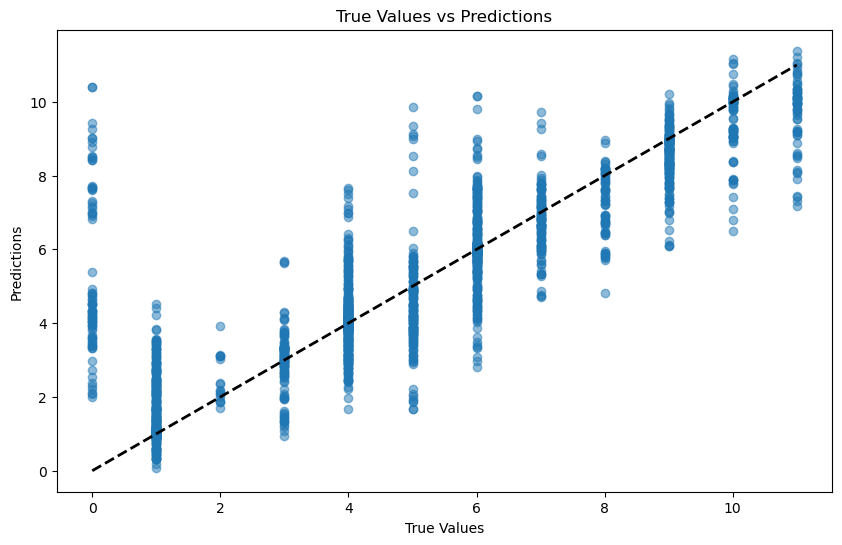

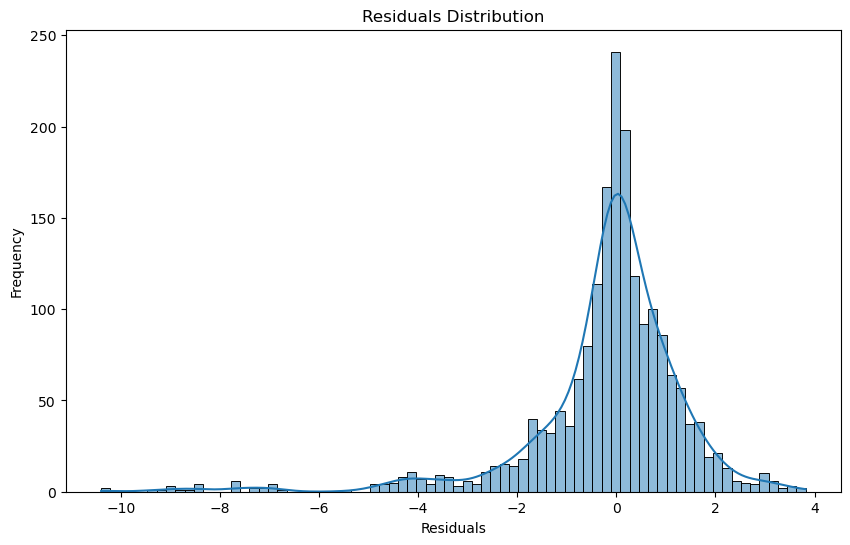

In [3]:
# 可视化回归残差
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# 残差分布图
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
